# Free energy landscapes and clustering with Gaussian mixture models

## 1. Reading the data

In [1]:
import numpy as np
import GMM_FE

data = np.loadtxt('data/CaM_PCA_CA_contacts_REST.txt')


## 2. Constructing the object and setting parameters
Create a free energy and clustering object. In principle, *data*, minimum number of components, *min_n_components*, and maximum number of components, *max_n_components* need to be specified. If *max_n_components* is not specified, the free energy estimation and clustering will be done using *min_n_components* components. The settings of necessary parameters will be printed below.

In [2]:
gmm_FE = GMM_FE.free_energy(data, min_n_components=4, max_n_components=14, temperature=300.0, 
                            n_iterations=3, n_grids=30, mixture_of_landscapes=True)

*------------------Gaussian mixture model free energy estimator------------------*
   n_splits = 3
   shuffle_data = False
   n_iterations = 3
   n_grids = 30
   covergence_tol = 0.0001
   mixture_of_landscapes = True
   axes limits (x_lim) = [[-4.8644411168558515, 10.83157794323054], [-6.875103988258936, 8.627237475799573]]
   temperature = 300.0
   min_n_components = 4
   max_n_components = 14
*--------------------------------------------------------------------------------*


## 3. Estimating free energy landscapes

Calling the function *landscape()* will estimate the density and free energy landscape given data. The axes limits of the landscape are printed above. The density estimation is performed with Gaussian mixture models (GMM) and *K*-fold cross-validation. The number of folds in the cross-validation is set with the variable *n_splits*. This is done in two ways depending on if *mixtures_of_landscapes* is set to True or False.
<br>
> **If *mixtures_of_landscapes* is set to False**:
> When *mixtures_of_landscaps* is False, cross-validation will be used to pick the "best" number of GMM components based on the highest log-likelihood of the validation datasets. The final landscape will then be estimated using the full dataset with the "best" number of components.
<br>
**If *mixtures_of_landscapes* is set to True**:
> When *mixtures_of_landscaps* is True, all density models obtained with the training set will be stored. The final density model will be the weighted average of all models. The weights are based on how well each model describes the validation data.
> <br>
> <br>
> **Other possibilities**:
> + Trying different setups of training GMMs/mixture of landscapes: 1. the dataset is split into a training and validation set. 2. fit all density models on the full dataset and weight together using the full dataset. The question is whether this will lead to overfitting and thus favor the more complex models.
> + Now it seems like ordinary ensembles of GMMs works as good as or just slightly better than the original GMM-CV, when comparing to a disjoint test dataset.
> + We would maybe like to integrate over number of components in a smarter way - MCMC or VI?

**This returns:**
1. *coords*: The coordinates of the grid that is used for visualization.
2. *FE_landscape*: The estimated free energy of each grid point.
3. *FE_points*: The estimated free energy of each point in *data*.

In [8]:
coords, FE_landscape, FE_points = gmm_FE.landscape()
print('Test set log-likelihood: '+str(gmm_FE.test_set_loglikelihood))

Estimating density with GMM.
# Components = 4
# Components = 5
# Components = 6
# Components = 7
# Components = 8
# Components = 9
# Components = 10
# Components = 11
# Components = 12
# Components = 13
# Components = 14
Weighting together all density estimators.
Evaluating density in landscape
Test set log-likelihood: 20.245182699149762


## 4. Visualizing the free energy landscape
To visualize the estimated free energy landscape, we call the *visualize* function. To visualize with the standard parameter settings, it is just to run 
<br>
> **gmm_FE.visualize()**

<br> However, you might want to change some of the parameters. 
<br><br>
**The following parameters can be changed:**
1. *title*: The title of the figure
2. *fontsize*: Title fontsize, other labels are changed according to this
3. *savefig*: True/False (whether to save a .png and .eps figure)
4. *xlabel*: The x-label
5. *ylabel*: The y-label
6. *vmax*: Colormap max cutoff value.
7. *n_contour_levels*: Determines the number and positions of the contour lines / regions in contourf.

Landscape weights: [5.25637081e-04 5.25637081e-04 5.25637081e-04 2.53537476e-06
 2.53537476e-06 2.53537476e-06 2.90854316e-06 2.90854316e-06
 2.90854316e-06 5.57588050e-06 5.57588050e-06 5.57588050e-06
 9.96621303e-04 9.96621303e-04 9.96621303e-04 2.17268108e-08
 2.17268108e-08 2.17268108e-08 1.17020330e-02 1.17020330e-02
 1.17020330e-02 6.37350033e-03 6.37350033e-03 6.37350033e-03
 1.61051171e-02 1.61051171e-02 1.61051171e-02 2.50354638e-01
 2.50354638e-01 2.50354638e-01 4.72647447e-02 4.72647447e-02
 4.72647447e-02]


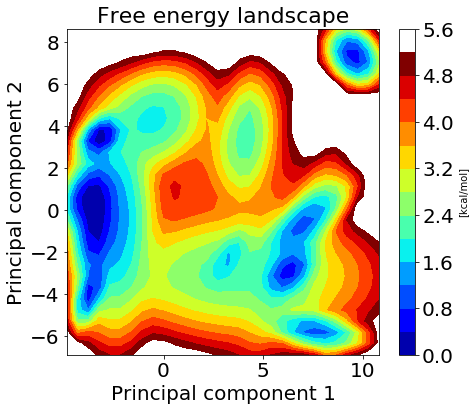

In [10]:
gmm_FE.visualize(savefig=False,vmax=5, n_contour_levels=15, xlabel='Principal component 1', ylabel='Principal component 2')
print('Landscape weights: '+str(gmm_FE.density_est_.estimator_weights_))

## 5. Cluster points at free energy minima
Clustering the free energy landscape can be done with 
<br> 
> **gmm_FE.cluster(data,FE_points)**

<br>Recall that *FE_points* is an array with the estimated free energy of each point in *data*. To make the clustering slightly more robust, we can do it over the grid that we use for visualization. The grid coordinates are kept in *coords*. In such case, we also need to parse *data* as a third argument to return the cluster labels and cluster center indices of the *data* points. 
<br> <br>
**This returns:**
1. *labels*: The cluster label/index of each point, denoting which cluster the point belongs to. If zero, the point is a transition point, otherwise it belongs to some intermediate state.
2. *cluster_centers*: Contains the indices corresponding to the point of each cluster that has the smallest free energy.
<br>

Note: Does not support mixtures of GMMs yet.

In [5]:
labels, cluster_centers = gmm_FE.cluster(coords,FE_points,data)

Clustering free energy landscape...
Computing gradients.
Computing Hessians.
Constructing connected components.
# Graph connections: 172.0
Clustering data points.
Done clustering.


## 6. Visualize free energy landscape with identified clusters

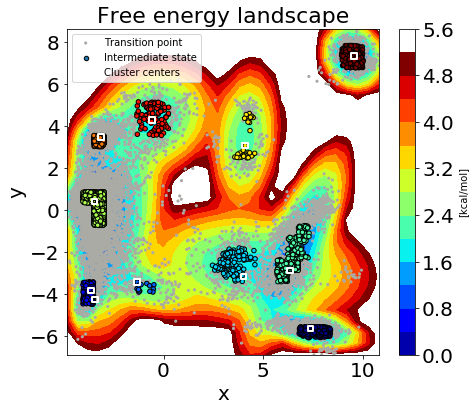

In [6]:
# Visualize free energy landscape with cluster labels
gmm_FE.visualize(savefig=True,vmax=5)